# 7333 - Quantifying the World
# Unit 8 Case Study
# Authors: Brandon De La Houssaye, Bruce Granger, Daniel Serna

In [10]:
import yahoo_fin
import requests_html
from yahoo_fin import stock_info as si
wmt_data = si.get_data("wmt")
wmt_data.head()

,open,high,low,close,adjclose,volume,ticker
date,,,,,,,
1972-08-25,0.063477,0.064697,0.063477,0.064453,0.037805,2508800.0,WMT
1972-08-28,0.064453,0.064941,0.064209,0.064209,0.037661,972800.0,WMT
1972-08-29,0.063965,0.063965,0.063477,0.063477,0.037232,1945600.0,WMT
1972-08-30,0.063477,0.063477,0.062988,0.063477,0.037232,409600.0,WMT
1972-08-31,0.062988,0.062988,0.062500,0.062500,0.036659,870400.0,WMT


In [3]:
wmt_data_1=wmt_data.drop(columns = ['volume'])

In [6]:
wmt_data_2=wmt_data.drop(columns = ['adjclose','volume'])

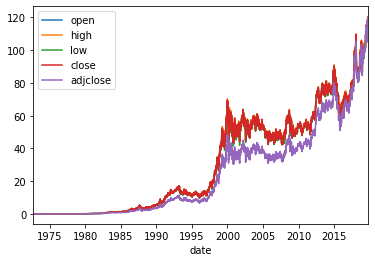

In [5]:
ax = wmt_data_1.plot()

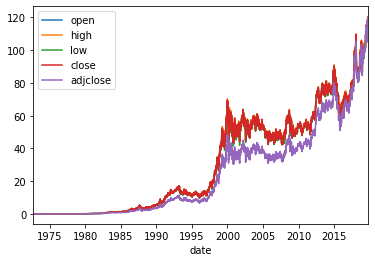

In [7]:
ax1=wmt_data_1.plot()

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
for param in pdq:
   for param_seasonal in seasonal_pdq:
       try:
           mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
           results = mod.fit()
           print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
       except:
           continue